In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## predicting wine quality

In [2]:
red_wine = pd.read_table('ml_drills/winequality-red.csv', sep=';')

In [3]:
red_wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# all 
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Lets run regression models using all features as baseline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()

feature_names = [i for i in red_wine.columns if red_wine[i].dtype not in [np.int64]]

X = red_wine[feature_names]

y = red_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.34363701984370354

In [8]:
# as base line performance, Knn with k of 5 significant under performs ols
from sklearn.neighbors import KNeighborsRegressor
feature_names = [i for i in red_wine.columns if red_wine[i].dtype not in [np.int64]]

X = red_wine[feature_names]

y = red_wine['quality']

knn = KNeighborsRegressor(n_neighbors=5)

#X_train, X_test, y_train, y_test = train_test_split(X, y)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.08926524894944599

In [10]:
#chech R^2 of knn with other k values, performance improves slightly
for x in range(5, 11):
    knn = KNeighborsRegressor(n_neighbors=x)
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))

0.08926524894944599
0.11286557154378363
0.12854483446249998
0.1288493781569675
0.1356085771525023
0.13795152595611004


In [13]:
# Let's do some eda and feature selection/engineering
import eli5
from eli5.sklearn import PermutationImportance
lr = LinearRegression()

feature_names = [i for i in red_wine.columns if red_wine[i].dtype not in [np.int64]]

X = red_wine[feature_names]

y = red_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

ols_model = lr.fit(X_train, y_train)

perm = PermutationImportance(ols_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2498 ± 0.0575,alcohol
0.1278 ± 0.0366,volatile acidity
0.0990 ± 0.0175,sulphates
0.0289 ± 0.0237,total sulfur dioxide
0.0180 ± 0.0150,chlorides
0.0150 ± 0.0173,fixed acidity
0.0111 ± 0.0170,pH
0.0087 ± 0.0113,density
0.0072 ± 0.0148,free sulfur dioxide
0.0064 ± 0.0078,citric acid


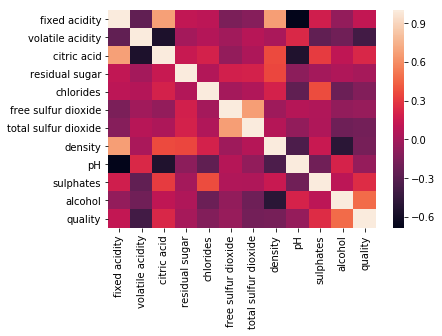

In [15]:
import seaborn as sns
sns.heatmap(red_wine.corr())

In [16]:
means = red_wine[['sulphates', 'chlorides']].mean(axis=0)
stds = red_wine[['sulphates', 'chlorides']].std(axis=0)
red_wine['sulphate_chloride'] = ((red_wine[['sulphates', 'chlorides']] - means) / stds).mean(axis=1)

plotdf = red_wine.loc[:, ['sulphates', 'chlorides']]
plotdf['sulphate_chloride'] = red_wine['sulphate_chloride'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                   sulphates  chlorides  sulphate_chloride
sulphates           1.000000   0.371260           0.828028
chlorides           0.371260   1.000000           0.828028
sulphate_chloride   0.828028   0.828028           1.000000


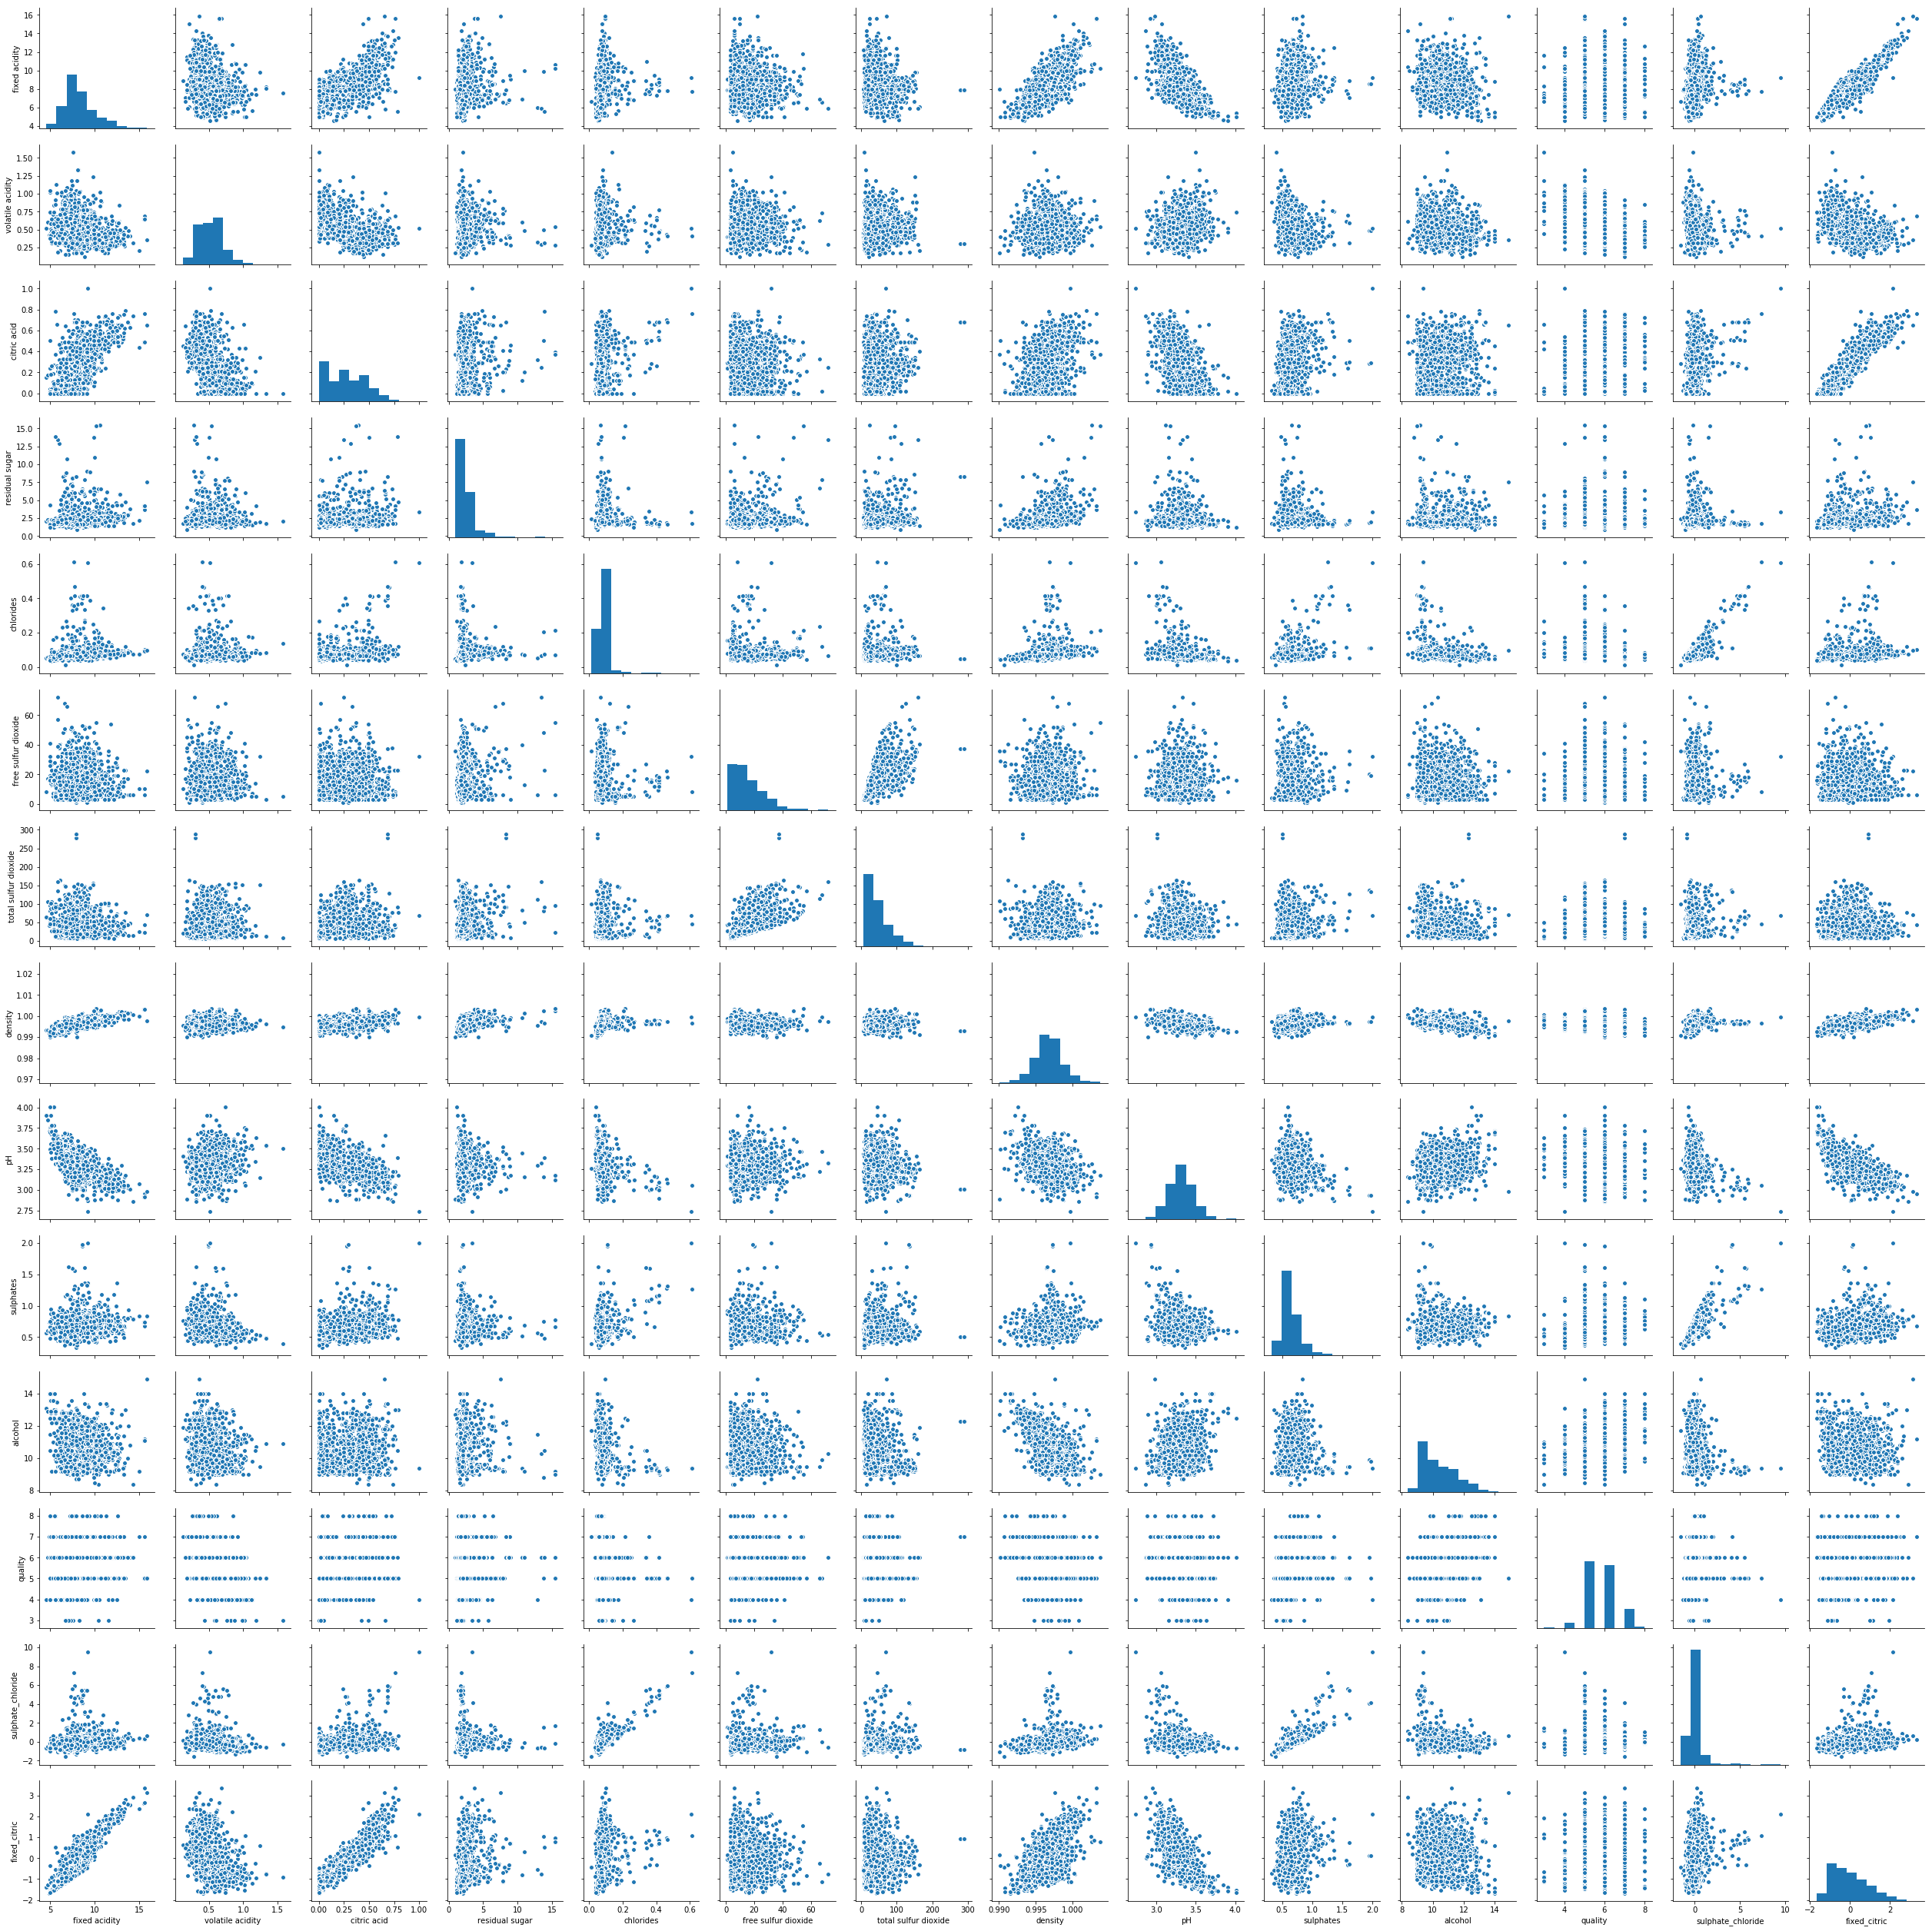

In [24]:
# none of the features seems to have a linear relationship with the quality of the wine
sns.pairplot(red_wine)

In [29]:
lr.predict(X_test)

array([5.83949387, 5.43192768, 6.25374354, 5.72301978, 6.71220506,
       5.9587431 , 6.27230211, 5.36545837, 5.79165936, 5.18760707,
       5.96675743, 5.40240929, 5.75368634, 6.23659071, 5.5744366 ,
       5.42803483, 5.78712277, 5.37024121, 5.76383705, 5.35002282,
       5.51804249, 5.95769476, 5.35373494, 6.38902535, 5.63825265,
       6.250613  , 6.01483987, 5.76152652, 5.26542602, 6.50750909,
       4.98415321, 6.19807834, 5.29550056, 6.12431302, 4.91023504,
       5.77620056, 5.31197871, 5.25330327, 6.17913022, 5.03636039,
       6.03855778, 5.38745346, 5.11787564, 6.05223091, 5.34742822,
       5.76064804, 5.12490328, 5.15843401, 5.17113684, 5.89654813,
       5.58725336, 5.45635795, 6.02919948, 5.07652819, 5.23714949,
       6.04973671, 6.01784718, 6.0489776 , 5.59347631, 5.3166295 ,
       6.5027911 , 5.41759108, 5.2857743 , 5.69130403, 4.80174942,
       5.67163843, 6.51598604, 5.65435843, 5.56199818, 6.39847115,
       4.91023504, 6.4399644 , 5.46876163, 5.51177184, 5.46874

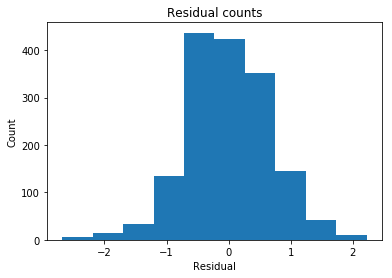

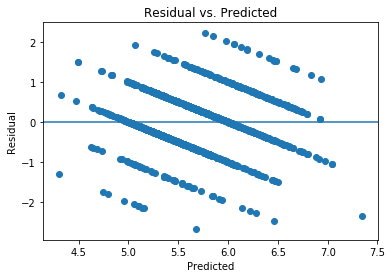

In [31]:
# residuals are normally distrbuted, distibution of error is NOT homoscedastic
predicted = lr.predict(X)
actual = red_wine['quality']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [19]:
X = red_wine[['alcohol', 'volatile acidity', 'sulphate_chloride']]

y = red_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.31196004662642585

In [21]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = red_wine[['alcohol', 'volatile acidity', 'sulphate_chloride']]

y = red_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.31168555541406684

In [22]:
#chech R^2 of knn with other k values, performance improves slightly
for x in range(5, 11):
    knn = KNeighborsRegressor(n_neighbors=x)
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))

0.31168555541406684
0.34148780131207235
0.3475347607526391
0.3476484570652404
0.34637440332362296
0.3424169107347509


# conclusions
Ols and knn regressiond were run on the raw data sets to compare baseline performance,
unsurprisingly, while both models produced low R^2 metrics, OLS significantly outperformed KNN. This is a result of the data hight dimensionality.

After processing the data and selecting fewer features based on permutation weights and composites of highly correlated variables knn achieved a similar level of performance to the OLS model (although overall performance is still very poor for bot models) Additionally increasing from 5 to 6 allowed the nearest neighbor regressing to slightly out perform  the OLS model. 

KNN regressor seems to perform best with low dimensional data and a proper selection of k. Furthermore, it does not need any of the assumptions of OLS.

When working with a very complex dataset with a high number of features I would use ols provided I can process the data and model to conform reasonably well to the assumptions of OLS. When working with low dimensional data Knn would provided similar or even slight better results with less data processing. 